In [ ]:
# configuring path
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Importing the Keras libraries and packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, SimpleRNN
from keras.optimizers import Adam, RMSprop
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau,TensorBoard,ModelCheckpoint,EarlyStopping

In [ ]:
# load data
df = pd.read_csv('for_time_series_forceasting_pedestrian_count.tsv',sep='\t')
df

,Date,Daily global solar exposure (MJ/m*m),Covid Restrictions,Rainfall amount (millimetres),Public_Holiday,Maximum temperature (Degree C),Minimum temperature (Degree C),Total_Pedestrian_Count_per_day
0,01-01-2015,23.6,0,0.0,1,26.9,13.3,471563
1,01-02-2015,26.8,0,0.0,0,38.8,15.4,389048
2,01-03-2015,26.5,0,0.0,0,38.2,20.0,291761
3,01-04-2015,25.2,0,4.6,0,21.4,16.3,382364
4,01-05-2015,30.7,0,0.0,0,22.0,15.0,487220
...,...,...,...,...,...,...,...,...
2127,10-27-2020,20.1,1,0.0,0,19.6,11.1,177267
2128,10-28-2020,26.7,1,0.0,0,20.9,9.5,311278
2129,10-29-2020,17.1,1,0.0,0,24.3,11.2,263334
2130,10-30-2020,21.0,1,0.0,0,18.6,12.9,313225


original data


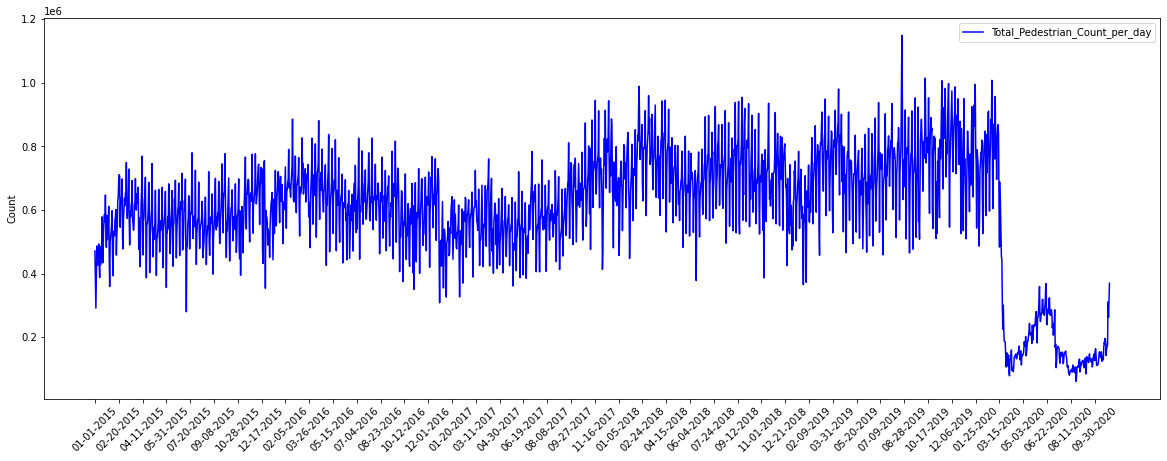

In [ ]:
# show pedestrian count each day
print('original data')
plt.figure(figsize = (20, 7))
plt.plot(range(len(df)), df['Total_Pedestrian_Count_per_day'], color='blue', label='Total_Pedestrian_Count_per_day')
plt.xticks(range(0,len(df),50),df['Date'].loc[::50],rotation=45)
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# Data Normalization
scaler = MinMaxScaler()
df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:].values)    # normalize feature except the date column


print('\nNormalized data')
plt.figure(figsize = (20, 7))
plt.plot(range(len(df)), df['Total_Pedestrian_Count_per_day'], color='blue', label='Total_Pedestrian_Count_per_day')
plt.xticks(range(0,len(df),50),df['Date'].loc[::50],rotation=45)
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
df

,Date,Daily global solar exposure (MJ/m*m),Covid Restrictions,Rainfall amount (millimetres),Public_Holiday,Maximum temperature (Degree C),Minimum temperature (Degree C),Total_Pedestrian_Count_per_day
0,01-01-2015,0.702454,0.0,0.00000,1.0,0.518841,0.463504,0.376885
1,01-02-2015,0.800613,0.0,0.00000,0.0,0.863768,0.540146,0.301011
2,01-03-2015,0.791411,0.0,0.00000,0.0,0.846377,0.708029,0.211554
3,01-04-2015,0.751534,0.0,0.08042,0.0,0.359420,0.572993,0.294865
4,01-05-2015,0.920245,0.0,0.00000,0.0,0.376812,0.525547,0.391282
...,...,...,...,...,...,...,...,...
2127,10-27-2020,0.595092,1.0,0.00000,0.0,0.307246,0.383212,0.106274
2128,10-28-2020,0.797546,1.0,0.00000,0.0,0.344928,0.324818,0.229500
2129,10-29-2020,0.503067,1.0,0.00000,0.0,0.443478,0.386861,0.185415
2130,10-30-2020,0.622699,1.0,0.00000,0.0,0.278261,0.448905,0.231290


#Neural Network Model


In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(layers.Dense(128, input_shape=(6,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
X=df.iloc[:,1:-1].astype('float64')
Y=df.iloc[:,-1].astype('float64')

validation_size = 0.1
seed = 8
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=validation_size, random_state=seed)

LR = 1e-4
EPOCH=1000
opt = Adam(lr=LR)
#opt = RMSprop(lr=LR)
model.compile(optimizer=opt, loss='mse')

history=model.fit(X_train, Y_train, epochs=EPOCH)

Epoch 1/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.2835
Epoch 2/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.2098
Epoch 3/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.0797
Epoch 4/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 5/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 6/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 7/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 8/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 9/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 10/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 11/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 12/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 13/1000
60/60 [====

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print(mse)

0.011201599303069387


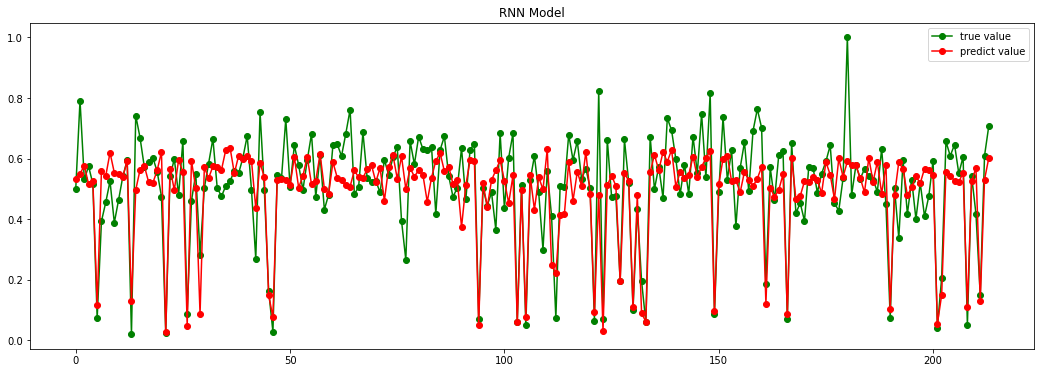

In [ ]:
plt.figure(figsize = (18,6))

plt.plot(np.arange(len(y_pred)),Y_test,'go-',label = 'true value')
plt.plot(np.arange(len(y_pred)),y_pred,'ro-',label = 'predict value')

plt.title('RNN Model')
plt.legend()
plt.show()


# MLPRegressor Model

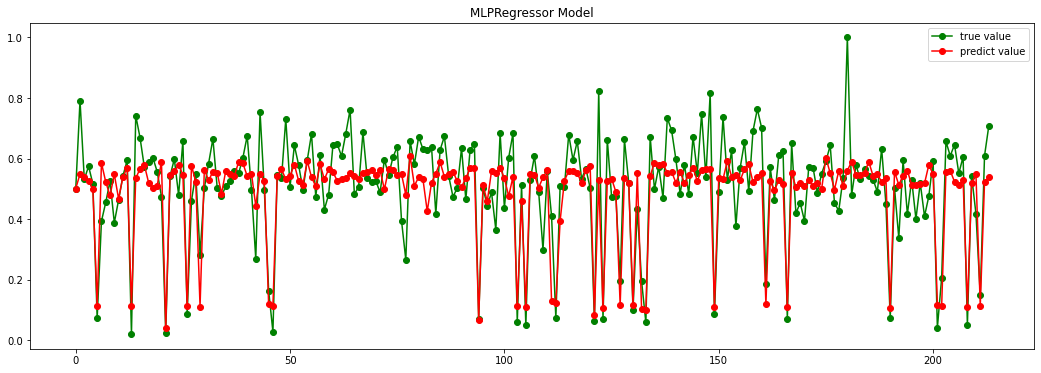

In [ ]:
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

X=df.drop(['Total_Pedestrian_Count_per_day','Date'],axis=1)
Y=df.iloc[:,-1]

validation_size = 0.1
seed = 8

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=validation_size, random_state=seed)
knn = MLPRegressor()
knn.fit(X_train,Y_train)
K_pred = knn.predict(X_test)
score = r2_score(Y_test, K_pred)  

plt.figure(figsize = (18,6))

plt.plot(np.arange(len(K_pred)),Y_test,'go-',label = 'true value')
plt.plot(np.arange(len(K_pred)),K_pred,'ro-',label = 'predict value')

plt.title('MLPRegressor Model')
plt.legend()
plt.show()


In [ ]:
mse = mean_squared_error(Y_test, K_pred)
print(mse)

0.010979543146902472


# LinearRegression Model

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
test_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, test_pred)
print(mse)

0.010965879923140442


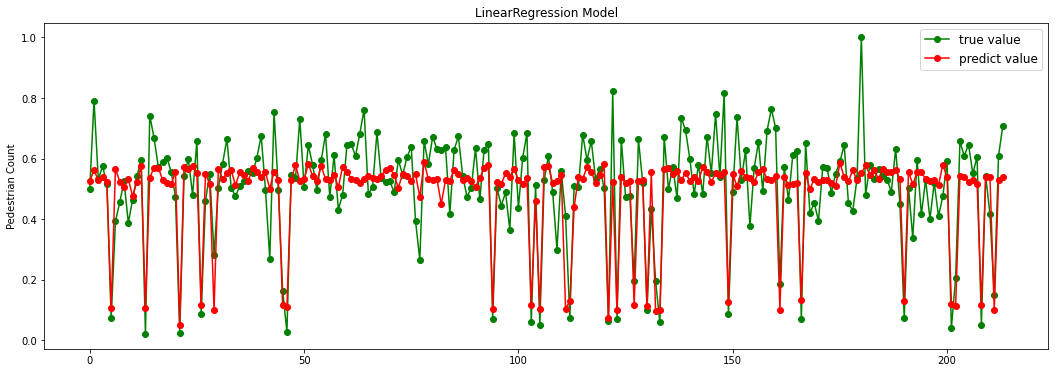

In [ ]:
plt.figure(figsize = (18,6))

plt.plot(np.arange(len(test_pred)),Y_test,'go-',label = 'true value')
plt.plot(np.arange(len(test_pred)),test_pred,'ro-',label = 'predict value')
plt.title('LinearRegression Model')
plt.ylabel('Pedestrian Count')
plt.legend(fontsize=12)
plt.show()